In [1]:
import pandas as pd
import numpy as np
from pandas import Series as sr, DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
#style.use('seaborn')
%matplotlib inline

In [2]:
data = pd.read_csv("../data.txt", sep = ' ', header = None)
data.head()


,0,1,2,3,4,5,6,7
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [3]:
data_column_names = ["Date", "Time", "Epoch", "Moteid", "Temperature", "Humidity", "Light", "Voltage"]
dplot = pd.read_csv("../data.txt", sep = ' ', names = data_column_names)
dplot.shape

(2313682, 8)

In [4]:
data = data[data[3]==8.0]
data.head()

,0,1,2,3,4,5,6,7
271451,2004-02-28,01:02:16.424892,9,8.0,19.1848,38.9742,108.56,2.68742
271452,2004-02-28,01:04:16.207199,13,8.0,19.0084,39.4502,108.56,2.68742
271453,2004-02-28,01:05:16.199782,15,8.0,18.9398,39.6539,108.56,2.69964
271454,2004-02-28,01:07:46.617313,20,8.0,18.8712,40.0607,108.56,2.68742
271455,2004-02-28,01:08:16.239454,21,8.0,18.8516,40.0945,108.56,2.69964


In [5]:
# print(S1df.shape)
outliersIListaS1 = []
outliersIListaVS1 = []
for i, row in data.iterrows():
    if row[4] >=26.2 :
        outliersIListaS1.append(i)
        outliersIListaVS1.append(row[4])
print(data.shape, len(outliersIListaS1))
# Removendo outliers no S1
passo3S1= data.copy()
print(passo3S1.head())
print(passo3S1.shape)

(16778, 8) 27
                 0                1   2    3        4        5       6  \
271451  2004-02-28  01:02:16.424892   9  8.0  19.1848  38.9742  108.56   
271452  2004-02-28  01:04:16.207199  13  8.0  19.0084  39.4502  108.56   
271453  2004-02-28  01:05:16.199782  15  8.0  18.9398  39.6539  108.56   
271454  2004-02-28  01:07:46.617313  20  8.0  18.8712  40.0607  108.56   
271455  2004-02-28  01:08:16.239454  21  8.0  18.8516  40.0945  108.56   

              7  
271451  2.68742  
271452  2.68742  
271453  2.69964  
271454  2.68742  
271455  2.69964  
(16778, 8)


In [6]:
passo3S1= passo3S1.drop(outliersIListaS1)
print(passo3S1.shape)
passo3S1.to_csv('S8macc.csv')
data = pd.read_csv("S8macc.csv")
data.shape

(16751, 8)


(16751, 9)

In [7]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)
data.head(1)

,0,1,2,3,4,5,6,7
0,2004-02-28,01:02:16.424892,9,8.0,19.1848,38.9742,108.56,2.68742


In [8]:
for key,d in data[:data.shape[0]].groupby('3'):
    print(key,"\n",d.head())
    print("--------------------------------")

8.0 
             0                1   2    3        4        5       6        7
0  2004-02-28  01:02:16.424892   9  8.0  19.1848  38.9742  108.56  2.68742
1  2004-02-28  01:04:16.207199  13  8.0  19.0084  39.4502  108.56  2.68742
2  2004-02-28  01:05:16.199782  15  8.0  18.9398  39.6539  108.56  2.69964
3  2004-02-28  01:07:46.617313  20  8.0  18.8712  40.0607  108.56  2.68742
4  2004-02-28  01:08:16.239454  21  8.0  18.8516  40.0945  108.56  2.69964
--------------------------------


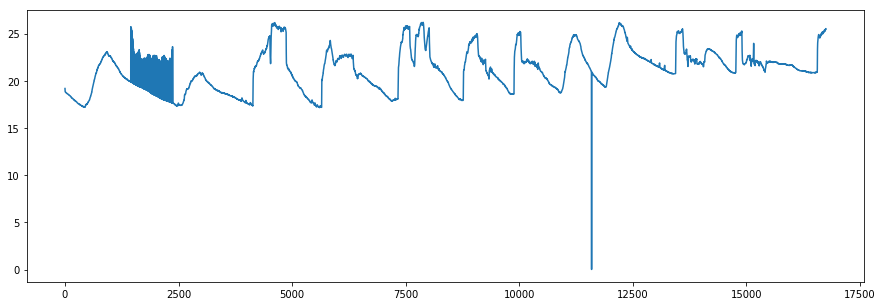

In [10]:
plt.figure(figsize = (15,5))
data[:data.shape[0]]['4'].plot()

In [11]:
for key, d in data[:data.shape[0]].groupby('3'):
    break
    d.head()

In [12]:
data.shape, d.shape

((16751, 8), (16751, 8))

In [13]:
d = d.sort_values(['0','1'],ascending = [1,1])

In [14]:
d.shape, (d.tail())

((16751, 8),
                0                1     2    3        4        5        6  \
 2360  2004-03-12  06:44:12.988476  3352  8.0  20.1354  41.2761   128.80   
 2362  2004-03-12  11:16:48.164131  3353  8.0  23.3008  39.0082   128.80   
 2364  2004-03-12  15:49:50.173633  3355  8.0  23.2322  40.7706  1847.36   
 2367  2004-03-12  20:22:50.214876  3357  8.0  23.6144  42.5178  1729.60   
 2368  2004-03-12  20:23:16.216925  3358  8.0  23.5948  42.5513     1.38   
 
             7  
 2360  2.42416  
 2362  2.45421  
 2364  2.42416  
 2367  2.35683  
 2368  2.39484  )

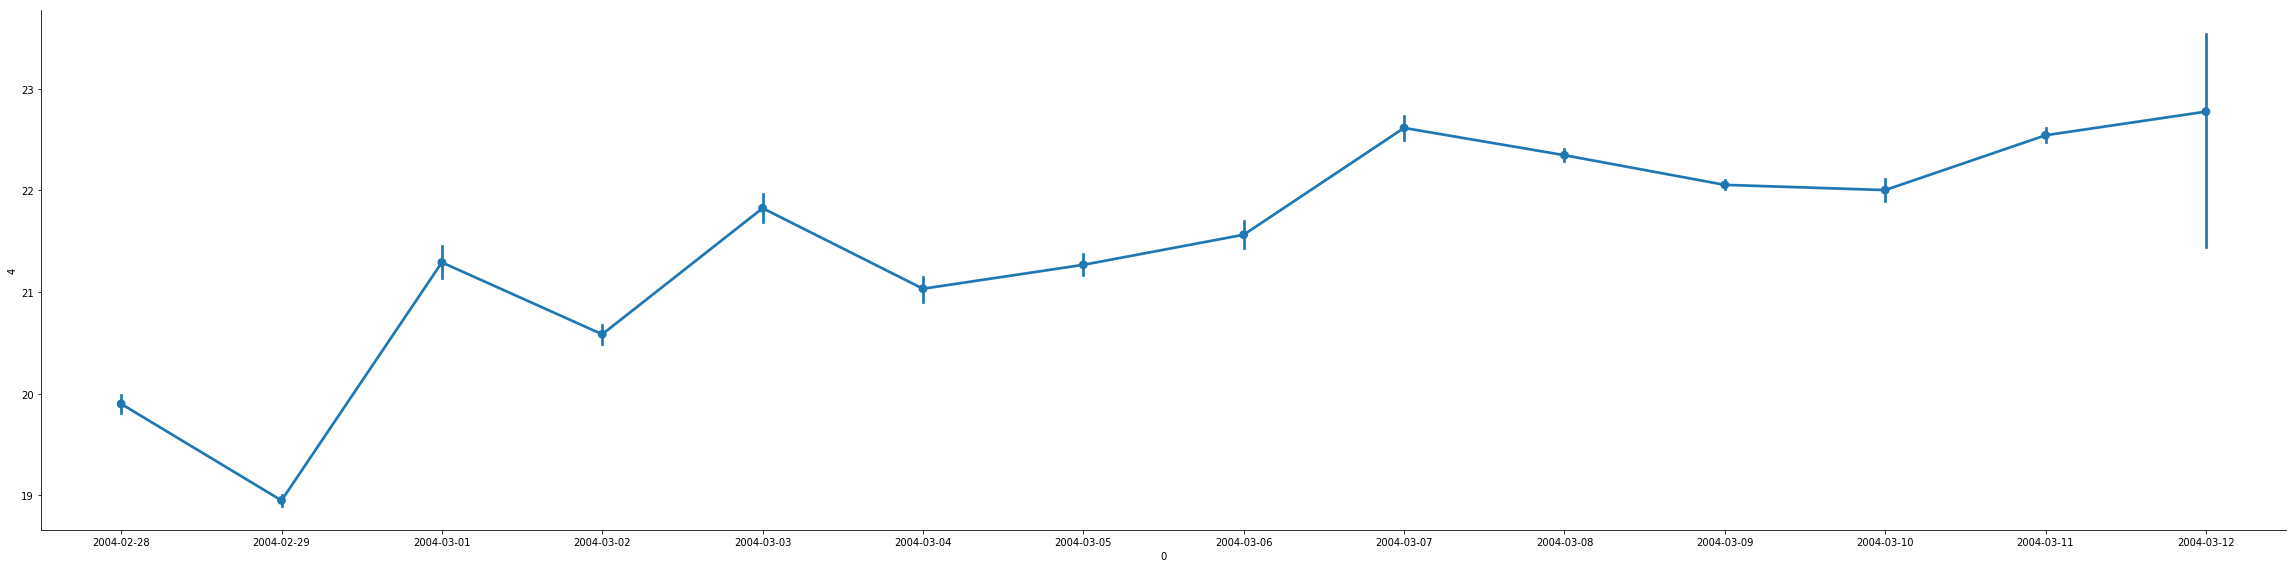

In [15]:
#plt.figure(figsize = (20,2))
sns.factorplot(x='0', y = '4', data = d, size = 8, aspect = 4)

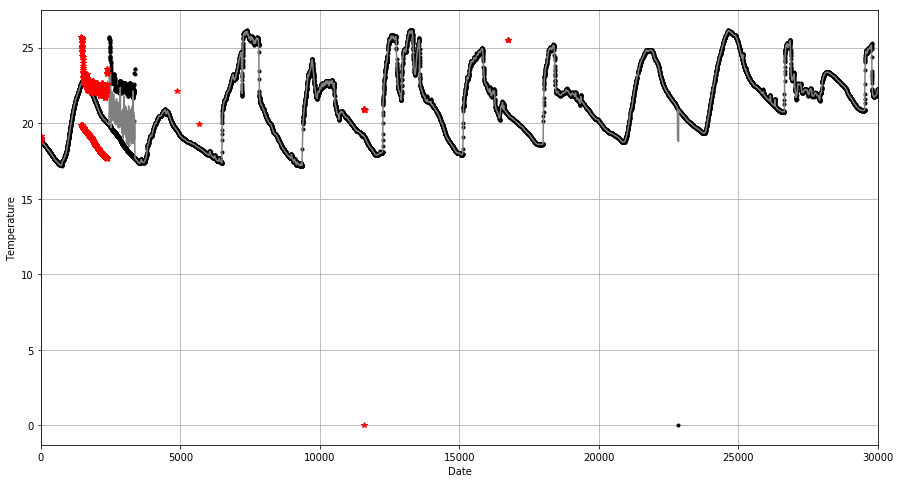

In [16]:
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
#style.use('fivethirtyeight')
%matplotlib inline
def moving_average(data, window_size):

    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):

    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 2),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}


def explain_anomalies_rolling_std(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using rolling standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies
    """
    avg = moving_average(y, window_size)
    avg_list = avg.tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    testing_std = pd.rolling_std(residual, window_size)
    testing_std_as_df = pd.DataFrame(testing_std)
    rolling_std = testing_std_as_df.replace(np.nan,
                                  testing_std_as_df.ix[window_size - 1]).round(3).iloc[:,0].tolist()
    std = np.std(residual)
    return {'stationary standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i)
                                                       for index, y_i, avg_i, rs_i in izip(count(),
                                                                                           y, avg_list, rolling_std)
              if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))])}


# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*")
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results2(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, )
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()


# 4. Lets play with the functions
x = data[:data.shape[0]]['2']
Y = data[:data.shape[0]]['4']

# plot the results
plot_results(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")
#events = explain_anomalies(y=Y, window_size=5, sigma=3)

# Display the anomaly dict
#print("Information about the anomalies model:{}".format(events))


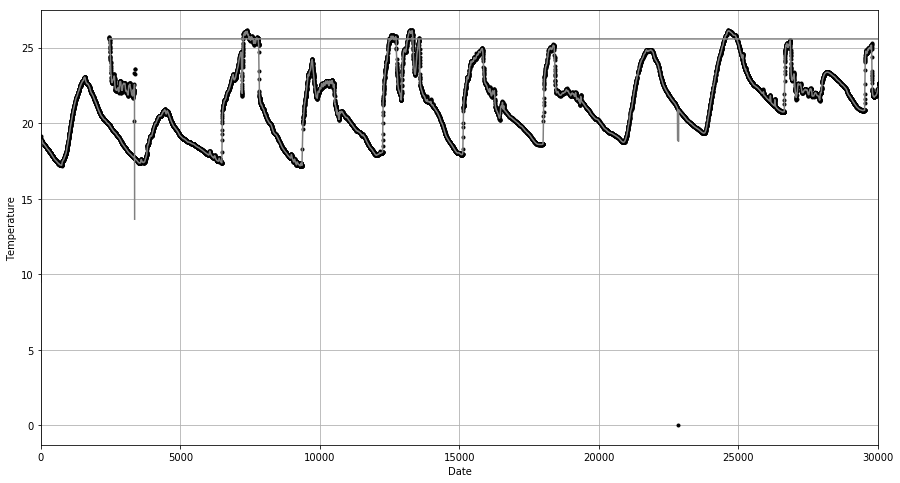

In [17]:

# 4. Lets play with the functions
x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

# plot the results
plot_results2(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")


In [18]:
def final_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    y_av = moving_average(y, window_size)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))
    return x_anomaly

# 4. Lets play with the functions
x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']
# Pegando os índices dos outliers e removendo do dataset final
outliersIndices = final_results(x, y=Y, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")
outliersIndices

61


array([    0,     1,     2,     3,     4,  3723,  3728,  4098,  4101,
        4455,  4456,  4458,  4459,  4460,  4461,  5235,  5236,  5238,
        5239,  5240,  5241,  6922,  6924,  8354,  8355,  8359,  8360,
        9470,  9471,  9472,  9475,  9478, 11175, 11176, 11177, 11178,
       11179, 11180, 11181, 11182, 11183, 11184, 13032, 13033, 14359,
       14360, 14361, 14490, 14491, 14745, 14746, 14747, 16147, 16148,
       16151, 16153, 16746, 16747, 16748, 16749, 16750])

In [19]:
## Checando e removendo outliers no step 3.
passoO= d[:d.shape[0]].copy()
print(passoO.shape)
passoO= passoO.drop(passoO.index[outliersIndices])
print(passoO.shape)

(16751, 8)
(16690, 8)


61


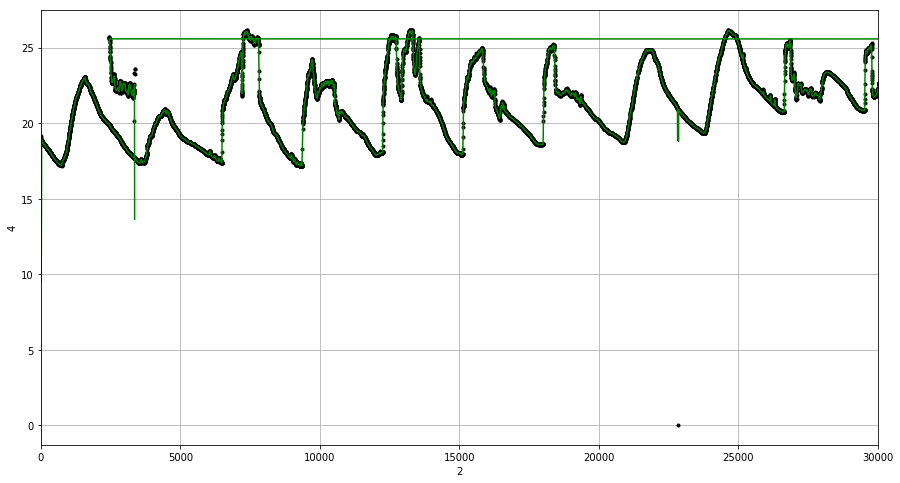

In [20]:
def plot_resultsFinal(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()  
def plot_resultsAOR(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()   
# Step 3 COmplete Antes de remover outliers

xF = d[:d.shape[0]]['2']
YF = d[:d.shape[0]]['4']

# plot residual
plot_resultsAOR(xF, y=YF, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")

# Depois de ter os dados reconstruídos - verificamos a sério temporal

6479


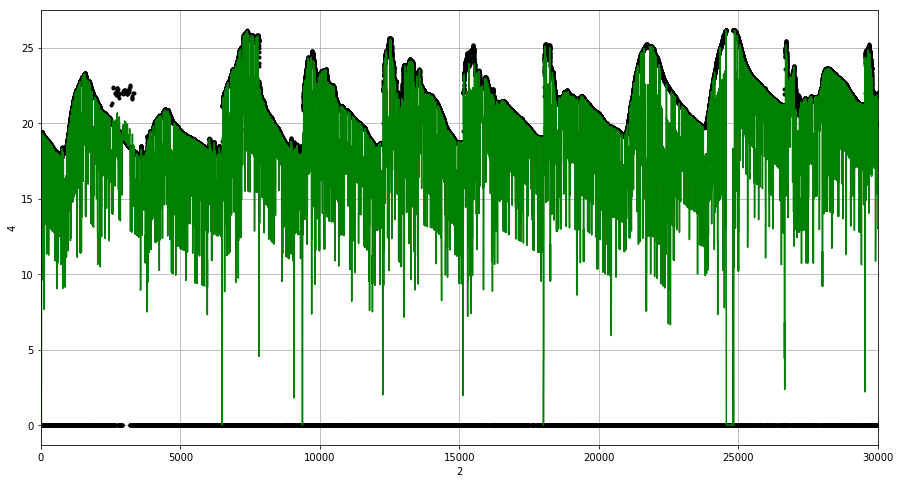

In [59]:
# Final reconstrução - passo 3 # Executar depois de gerar o dataframe teste no scrip do sensor
xF = teste['2']
YF = teste['4']

# plot final rec
plot_resultsFinal(xF, y=YF, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")


# Estatísticas Simples

In [21]:
dplot[dplot['Moteid']==8].shape

(16778, 8)

In [22]:
# Passo 0
sensor = 8
myDicInit = {
    'Data type':['Raw Data'],
    'size':[dplot[dplot['Moteid']==sensor].shape[0]], # Pegamos o shape dos dados brutos de dplot para cada sensor
    'mean':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mean(),
    'SD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].std(), 
    'median':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].median(),
    'MAD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mad()  
}

df0 = pd.DataFrame(myDicInit)
df0.head()


,Data type,size,mean,SD,median,MAD
0,Raw Data,16778,21.326354,3.678869,21.3506,1.882725


In [23]:
# Passo 1
myDic = {
    'Data type':['step 1 (BOR)'],
    'size':[d.shape[0]], # d.shape[0] sensor
    'mean':d[:d.shape[0]]['4'].mean(),
    'SD':d[:d.shape[0]]['4'].std(), 
    'median':d[:d.shape[0]]['4'].median(),
    'MAD':d[:d.shape[0]]['4'].mad()  
}

df = pd.DataFrame(myDic)
df.head()


,Data type,size,mean,SD,median,MAD
0,step 1 (BOR),16751,21.235066,2.217833,21.3506,1.79607


In [24]:
# Passo 2

myDicResidualRemoved = {
    'Data type':['step 2 (AOR'],
    'size':[passoO.shape[0]],
    'mean':passoO['4'].mean(),
    'SD':passoO['4'].std(), 
    'median':passoO['4'].median(),
    'MAD':passoO['4'].mad()  
}

dfResAOR = pd.DataFrame(myDicResidualRemoved)
print(passoO.shape[0])
dfResAOR.head()

16690


,Data type,size,mean,SD,median,MAD
0,step 2 (AOR,16690,21.235887,2.212344,21.3506,1.795186


# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip sx_sy_sz-FI 

In [38]:
# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip s2_s1_s3-FI 

myDicFinalImputation = {
    'Data type':['step 3'],
    'size':[teste.shape[0]],
    'mean':teste['4'].mean(),
    'SD':teste['4'].std(), 
    'median':teste['4'].median(),
    'MAD':teste['4'].mad()  
}

dfFinalI = pd.DataFrame(myDicFinalImputation)
print(teste.shape[0])
dfFinalI.head()

65536


,Data type,size,mean,SD,median,MAD
0,step 3,65536,18.152798,2.1194,17.1,1.593237


In [39]:
print( df0.head() )
print( df.head() )
print( dfResAOR.head() )
print( dfFinalI.head() )


  Data type   size       mean        SD   median       MAD
0  Raw Data  16778  21.326354  3.678869  21.3506  1.882725
      Data type   size       mean        SD   median      MAD
0  step 1 (BOR)  16751  21.235066  2.217833  21.3506  1.79607
     Data type   size       mean        SD   median       MAD
0  step 2 (AOR  16690  21.235887  2.212344  21.3506  1.795186
  Data type   size       mean      SD  median       MAD
0    step 3  65536  18.152798  2.1194    17.1  1.593237


##  Etapa para reconstruir as Épocas que estão faltando

In [25]:
indiceImput = []
for i in range(65536):
    indiceImput.append(i)
np.max(indiceImput)

65535

In [26]:
passoOEp = passoO['2'].tolist()
len(passoOEp)

16690

In [27]:
idInputEq = set(indiceImput)
idInputNEq = set(passoOEp)
resultIntersecEp = list( idInputEq - idInputNEq )

print(len(resultIntersecEp)) # {4, 6, 10}

print(len(idInputEq), len(idInputNEq))
# print('min max ',np.min(idInputEq), np.max(idInputNEq) )    

48853
65536 16683


In [28]:
# Create a time series of 2000 elements, one very five minutes starting on 1/1/2000
time = pd.date_range('2004-02-28', periods=65536, freq='31s')

# Create a pandas series with a random values between 0 and 100, using 'time' as the index
series = pd.Series(np.random.randint(100, size=65536), index=time)
# View the first few rows of the data
series[0:3]

2004-02-28 00:00:00    68
2004-02-28 00:00:31    93
2004-02-28 00:01:02    50
Freq: 31S, dtype: int32

In [29]:
# dfHora = series.to
dfHora  =pd.DataFrame(series, columns=['1'])

data.shape, type( len(resultIntersecEp) ), dfHora.head(1)

((16751, 8), int,              1
 2004-02-28  68)

In [30]:
# tamanho resultIntersecEp # CSV das épocas faltantes
listofzeros = [0] * len(resultIntersecEp)

#len(resultIntersecEp)
myDicNewdf2 = {
    '0':dplot[:len(resultIntersecEp)]['Date'],
    '1':dplot[:len(resultIntersecEp)]['Time'],#data[:32828]['1']
    '2':resultIntersecEp[:len(resultIntersecEp)],
    '3':dplot[:len(resultIntersecEp)]['Moteid'], 
    '4':listofzeros,
    '5':dplot[:len(resultIntersecEp)]['Humidity'],
    '6':dplot[:len(resultIntersecEp)]['Light'],
    '7':dplot[:len(resultIntersecEp)]['Voltage']  
}

dfOut = pd.DataFrame(myDicNewdf2)
print(dfOut.shape[0])
dfOut.to_csv('csvAllOutliers.csv', index=False)
dfOut.tail(10)


48853


,0,1,2,3,4,5,6,7
48843,2004-03-02,11:49:34.366375,65526,2.0,0,33.0709,412.16,2.67532
48844,2004-03-02,11:50:12.138575,65527,2.0,0,33.1409,412.16,2.67532
48845,2004-03-02,11:50:39.998756,65528,2.0,0,33.0709,412.16,2.67532
48846,2004-03-02,11:51:54.269967,65529,2.0,0,33.0009,412.16,2.67532
48847,2004-03-02,11:52:45.474571,65530,2.0,0,33.0709,412.16,2.66332
48848,2004-03-02,11:54:16.104475,65531,2.0,0,33.0009,412.16,2.67532
48849,2004-03-02,11:54:31.292936,65532,2.0,0,32.9308,412.16,2.67532
48850,2004-03-02,11:55:23.747216,65533,2.0,0,33.0009,412.16,2.67532
48851,2004-03-02,11:56:15.320018,65534,2.0,0,32.9308,412.16,2.67532
48852,2004-03-02,11:56:29.016964,65535,2.0,0,32.9659,412.16,2.67532


# Gerando o csv para fazer reconstrução dos dados

In [31]:
# Gerando o csv para fazer reconstrução dos dados
dfFinalStep = pd.concat([dfOut,passoO], sort='2', axis=0)
dfFinalStep.sort_values(by = '2', inplace = True)

# dfFinalStep.set_index('2', inplace=True)
print(dfFinalStep.shape)

dfFinalStep.tail(25)
# 65536-65623
dfFinalStep.to_csv('dfImputation.csv', index=False)

(65543, 8)


# Depois de ter obtido o resultado do script joga o resultado aqui

In [37]:
final= pd.read_csv('finalS8.csv')
teste = final.drop_duplicates(subset=['2'],keep='first', inplace=False)
teste.shape, dfFinalStep.shape


((65536, 9), (65543, 8))